## Regression
#### Regression is a statistical technique used to understand and model the relationship between a dependent variable and one or more independent variables. The main goal is to predict the value of the dependent variable based on the values of the independent variables


### Linear Regression

In [3]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
import numpy as np

In [5]:
reviews_data=pd.read_csv("D:/Associate - Junior DS Assessment/Junior (A - L2) Data Science/Data/final_ds_nlp/modified_final_file.csv")

In [27]:
reviews_data = reviews_data.dropna(subset=['raw_rating'])

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the review texts
X = vectorizer.fit_transform(reviews_data['translated_content'])

# Target variable
y = reviews_data['raw_rating']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings for the test set
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_clipped = np.clip(y_pred_rounded, 1, 5)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.9245923373766383
R-squared: -0.24809043562308242


In [29]:
# Example new reviews
new_reviews = [
    "The service was fantastic and the staff was very friendly!",
    "The food was terrible and the restaurant was dirty."
]

# Transform the new reviews into the same TF-IDF features
new_reviews_transformed = vectorizer.transform(new_reviews)

# Predict ratings using the trained model
predicted_ratings = model.predict(new_reviews_transformed)

# Display predictions
for review, rating in zip(new_reviews, predicted_ratings):
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating:.2f}")

Review: The service was fantastic and the staff was very friendly!
Predicted Rating: 5.42
Review: The food was terrible and the restaurant was dirty.
Predicted Rating: 1.40


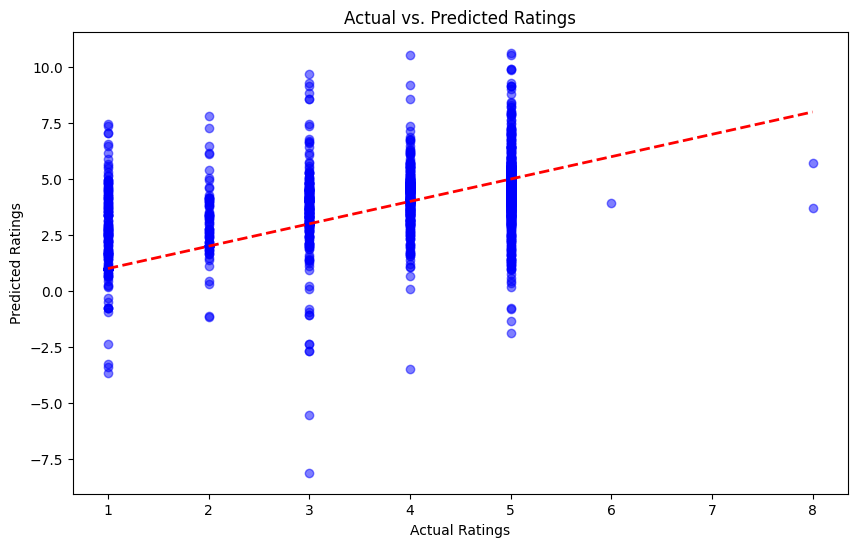

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.show()


### Ploynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures


In [30]:
df=pd.read_csv("D:/Associate - Junior DS Assessment/Junior (A - L2) Data Science/Data/final_ds_nlp/modified_final_file.csv")

Mean Squared Error: 1.5764343473238351
R-squared: -0.02231137112625503


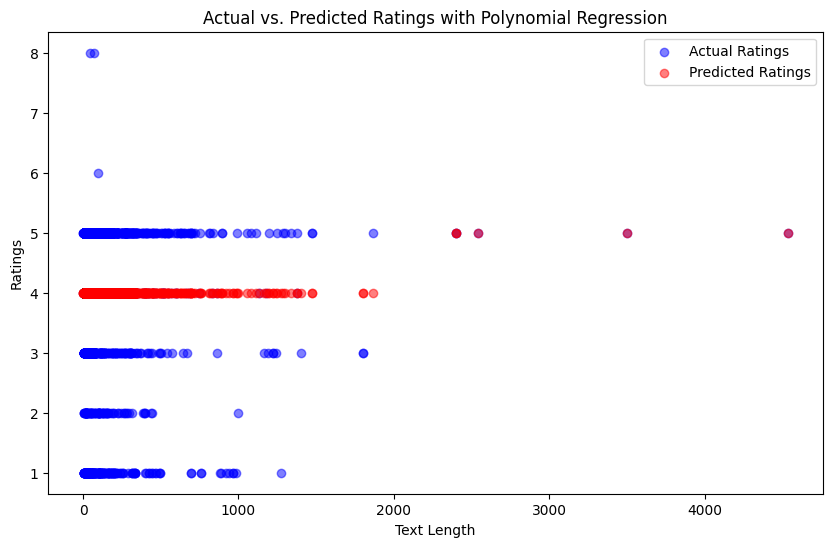

In [40]:
df=df.dropna(subset=['raw_rating'])
df['length']=df['translated_content'].apply(len)

X=df[['length']].values
y=df['raw_rating'].values

poly = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 5: Train the Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

# Round and clip the predictions to match rating scale
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_clipped = np.clip(y_pred_rounded, 1, 5)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 7: Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, alpha=0.5, color='blue', label='Actual Ratings')
plt.scatter(X_test[:, 1], y_pred_clipped, alpha=0.5, color='red', label='Predicted Ratings')
plt.xlabel('Text Length')
plt.ylabel('Ratings')
plt.title('Actual vs. Predicted Ratings with Polynomial Regression')
plt.legend()
plt.show()

### Multiple Linear Regression

In [44]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Convert sentiment labels to numeric
le = LabelEncoder()
sentiment_scores = le.fit_transform(df['sentiment2'])
sentiment_scores = sentiment_scores.reshape(-1, 1)
text_lengths=df[['length']].values
# Assuming you have the sentiment scores and text lengths as arrays
X = np.column_stack((sentiment_scores, text_lengths))  # Combine sentiment and text length
y=df['raw_rating'].values


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.0449286242175977
R-squared: 0.32236796516999366


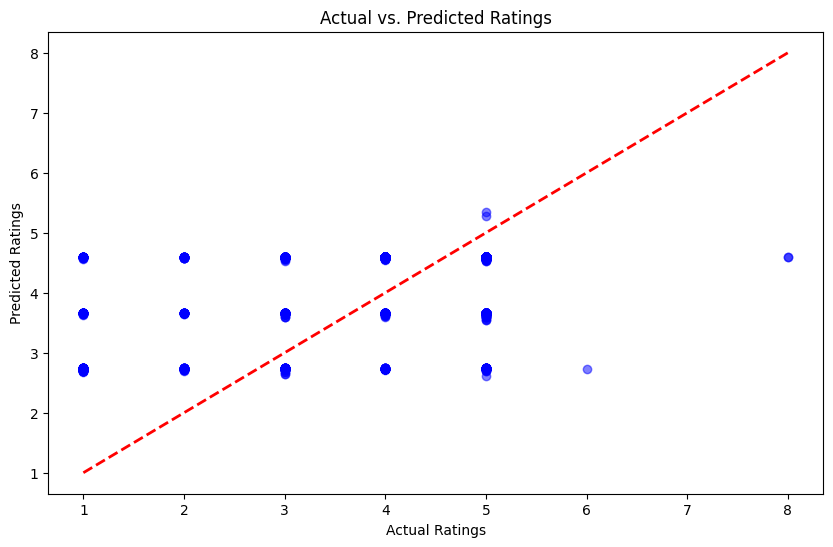

In [45]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.show()


In [46]:
new_reviews_data = {
    'sentiment2': ['positive', 'negative', 'neutral'],
    'length': [120, 150, 90]
}

new_df = pd.DataFrame(new_reviews_data)
# Encode sentiment labels
new_sentiment_scores = le.transform(new_df['sentiment2'])
new_sentiment_scores = new_sentiment_scores.reshape(-1, 1)

# Extract text lengths
new_text_lengths = new_df[['length']].values

# Combine features
new_X = np.column_stack((new_sentiment_scores, new_text_lengths))

# Scale features
new_X_scaled = scaler.transform(new_X)

# Optionally apply polynomial features if used during training
# new_X_poly = poly.transform(new_X_scaled)
# Predict ratings for the new data
new_y_pred = model.predict(new_X_scaled)

# Display predictions
for sentiment, length, rating in zip(new_df['sentiment2'], new_df['length'], new_y_pred):
    print(f"Sentiment: {sentiment}, Length: {length}, Predicted Rating: {rating:.2f}")


Sentiment: positive, Length: 120, Predicted Rating: 3.25
Sentiment: negative, Length: 150, Predicted Rating: 0.61
Sentiment: neutral, Length: 90, Predicted Rating: 1.93
